In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import warnings
from data_visualisation_methods import *
warnings.filterwarnings("ignore")

df = pd.read_csv("data.csv") 
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [2]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

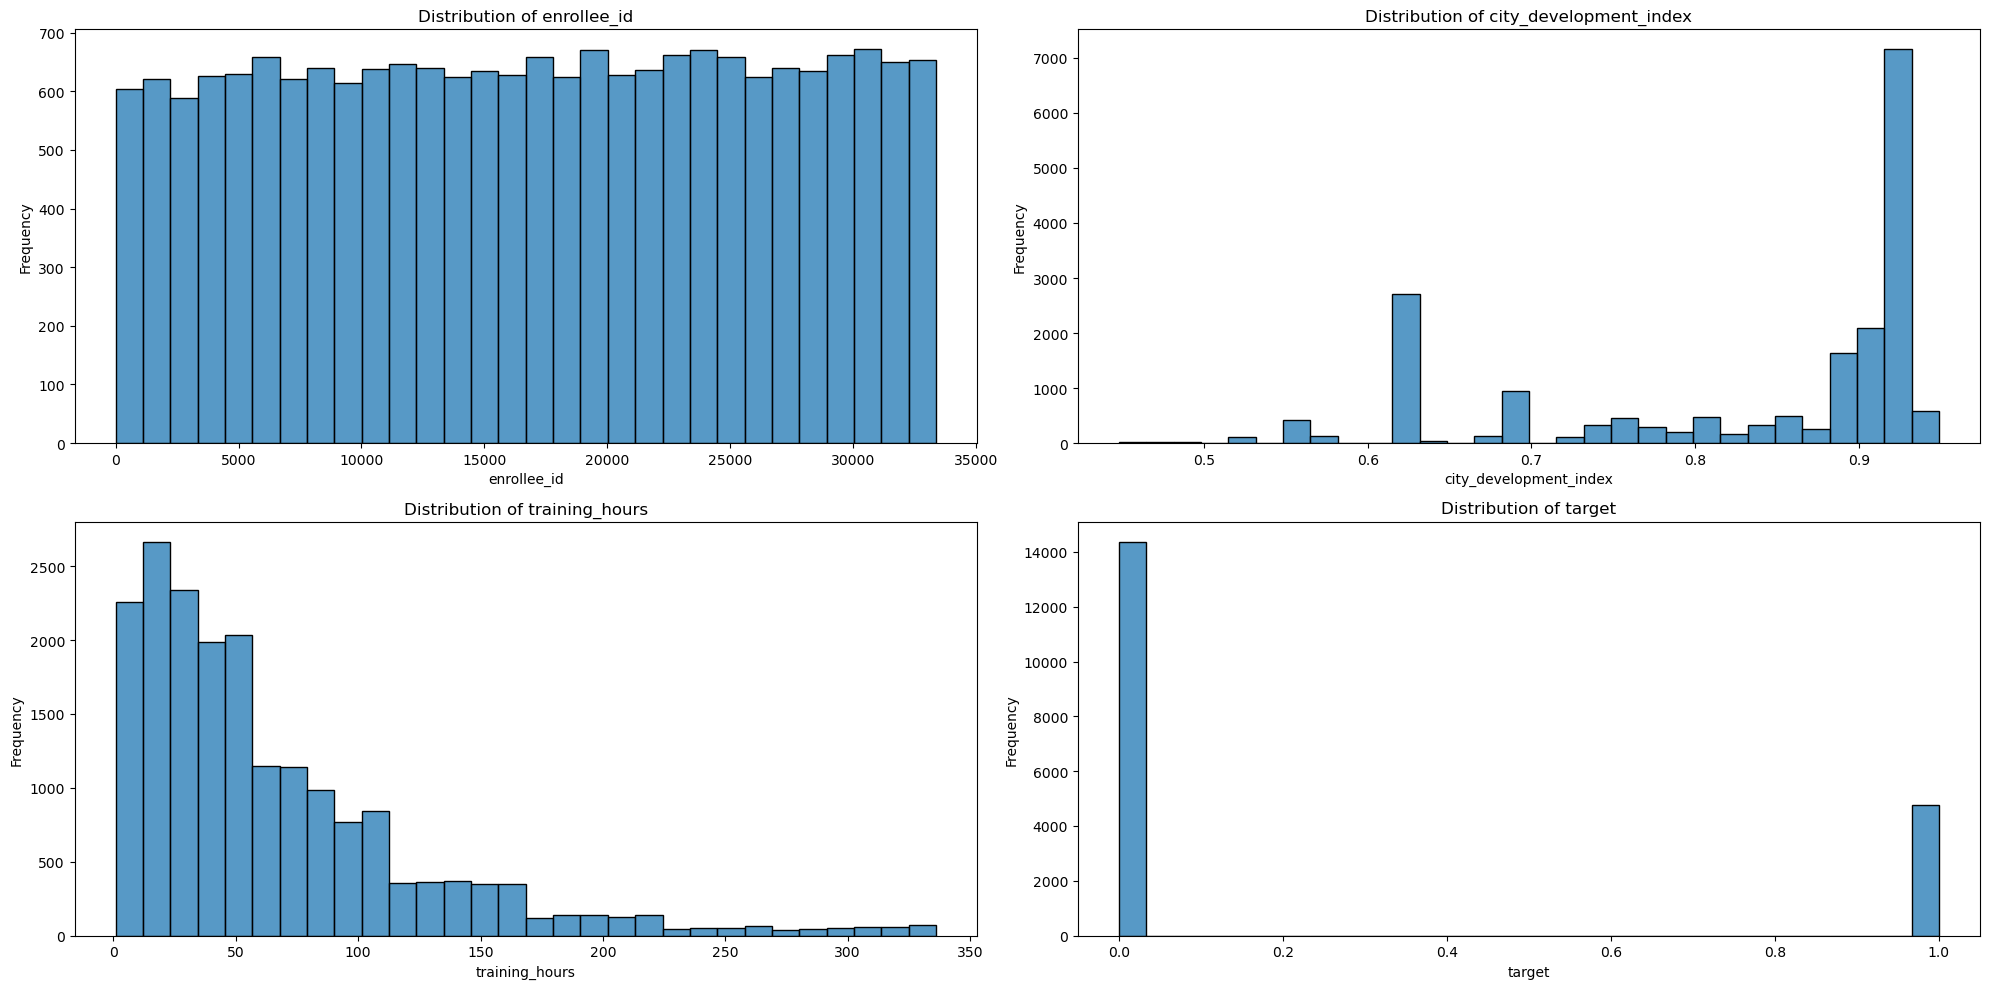

In [5]:
plot_numerical_columns_distribution(df, 2, 2)

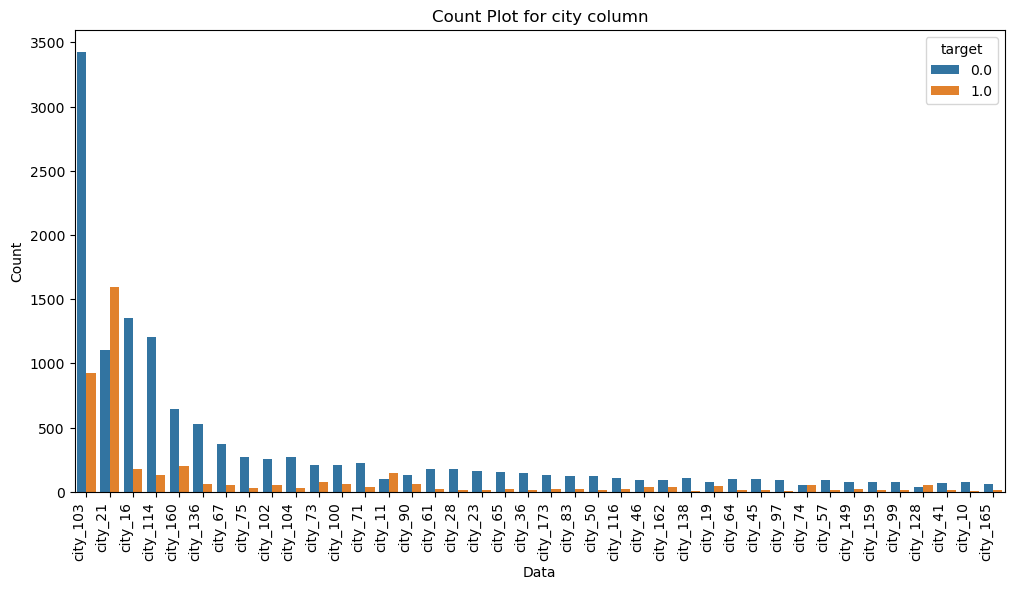

In [6]:
target_countplot(df,'city','target')

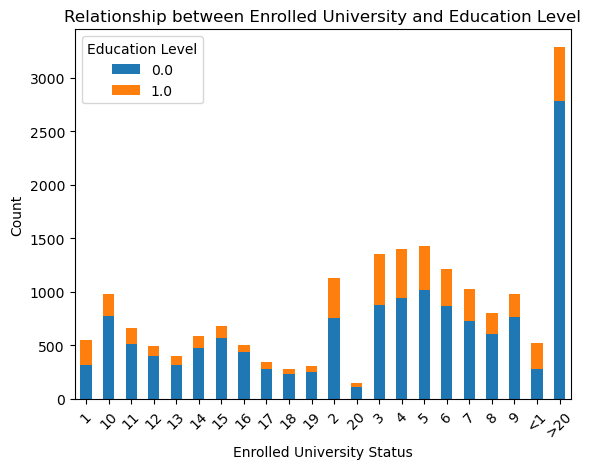

In [7]:
crosstab = pd.crosstab(df['experience'], df['target'])

crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Enrolled University Status')
plt.ylabel('Count')
plt.title('Relationship between Enrolled University and Education Level')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.show()

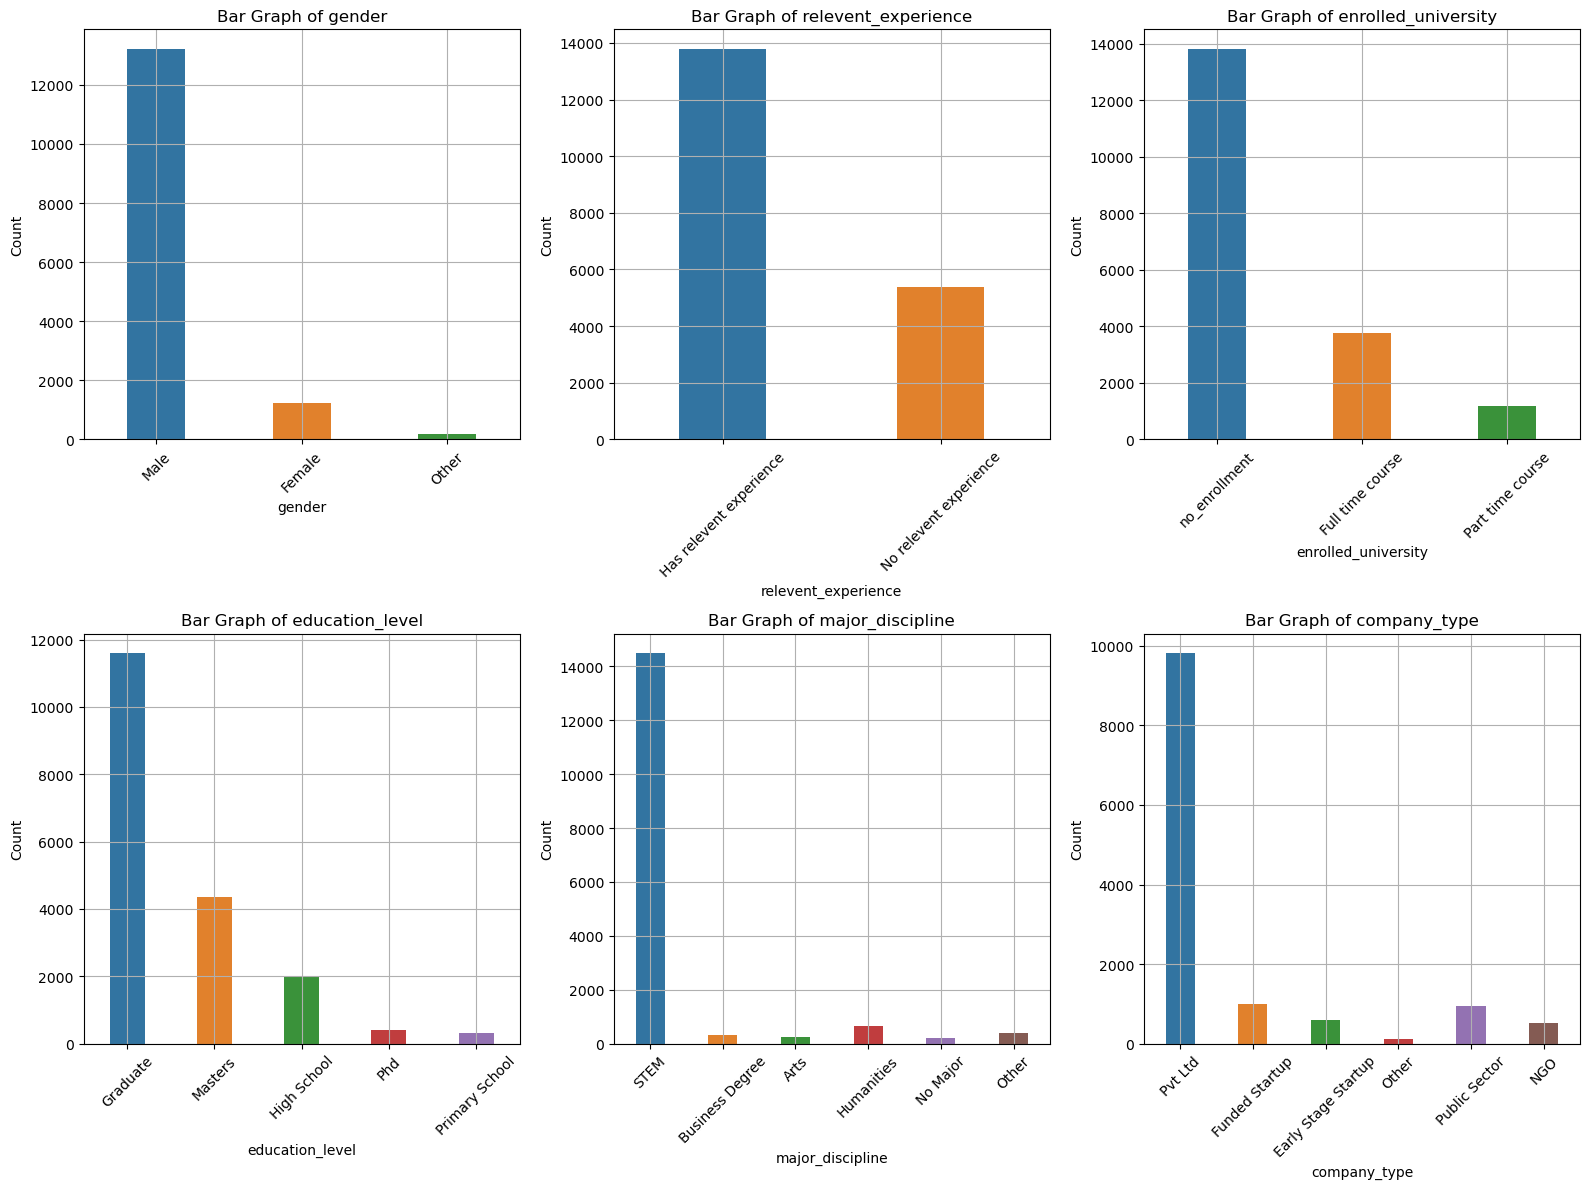

In [8]:
plot_categorical_columns(df[['gender',
                             'relevent_experience',
                             'enrolled_university',
                             'education_level',
                             'major_discipline',
                             'company_type']],3,2)

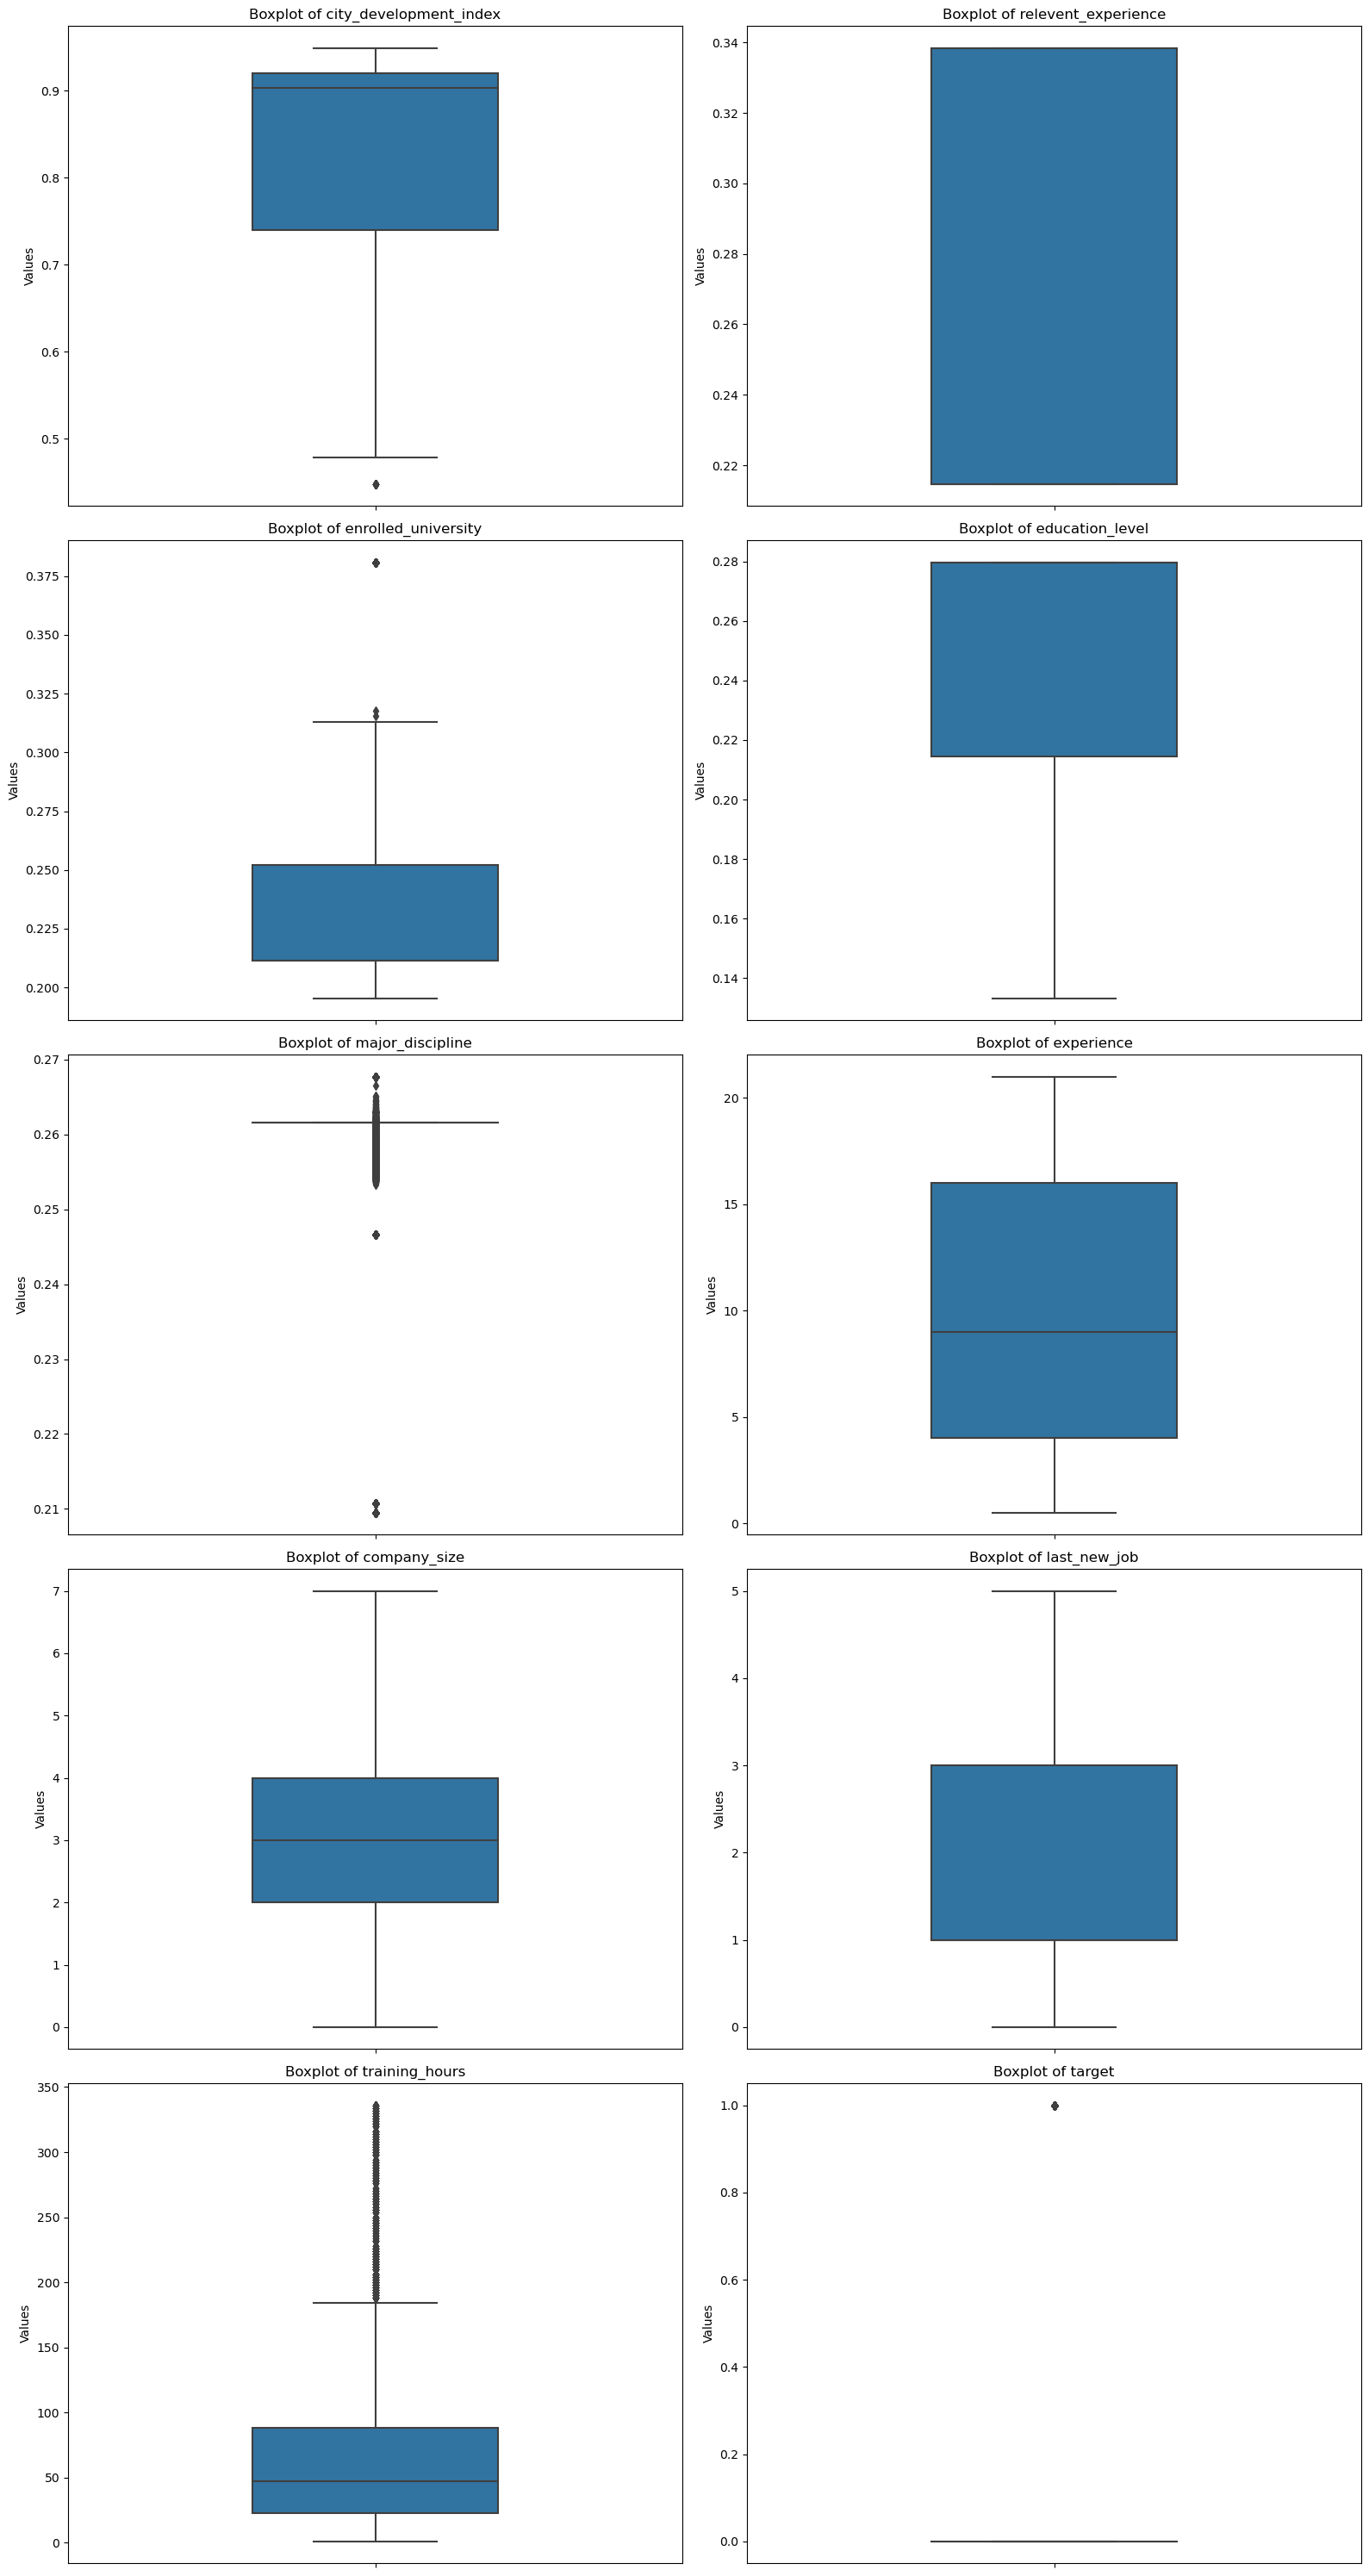

In [21]:
plot_outliers_boxplot(df)

In [9]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [11]:
def convert_thresholds(x):
    if x is None:
        return None

    if isinstance(x, int):
        return x

    if isinstance(x, float):
        if math.isnan(x):
            return None
        return int(x)

    if isinstance(x, str):
        if x == 'never':
            x = 0
        elif '>' in x:
            x = int(x.split('>')[-1]) + 1
        elif '<' in x:
            x = int(x.split('<')[-1]) - 0.5
        else:
            x = int(x.strip())

    return x

df['experience'] = df['experience'].map(convert_thresholds)
df['last_new_job'] = df['last_new_job'].map(convert_thresholds)

print(df['experience'].unique())
print(df['last_new_job'].unique())

[21.  15.   5.   0.5 11.  13.   7.  17.   2.  16.   1.   4.  10.  14.
 18.  19.  12.   3.   6.   9.   8.  20.   nan]
[ 1.  5.  0.  4.  3.  2. nan]


In [12]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [13]:
company_size = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}

df['company_size'] = df.company_size.map(lambda x: company_size.get(x, None))

In [14]:
df.drop(columns=['enrollee_id', 'city', 'gender', 'company_type'], inplace=True)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,1.0,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15.0,2.0,5.0,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,0.0,83,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,0.5,NaN,0.0,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,21.0,2.0,4.0,8,0.0


In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
for column in categorical_columns:
    print(f"{column} : {df[column].unique()}\n")

In [25]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for k, v in df[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column city_development_index outliers = 0.09%
Column relevent_experience outliers = 0.00%
Column enrolled_university outliers = 19.62%
Column education_level outliers = 0.00%
Column major_discipline outliers = 100.00%
Column experience outliers = 0.00%
Column company_size outliers = 10.54%
Column last_new_job outliers = 0.00%
Column training_hours outliers = 5.14%
Column target outliers = 100.00%


In [16]:
from category_encoders import TargetEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

encoder = TargetEncoder(handle_missing = 'return_nan')
df[categorical_columns] = encoder.fit_transform(df[categorical_columns], df['target'])
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,0.920,0.214690,0.211406,0.27979,0.261593,21.0,NaN,1.0,36,1.0
1,0.776,0.338427,0.211406,0.27979,0.261593,15.0,2.0,5.0,47,0.0
2,0.624,0.338427,0.380889,0.27979,0.261593,5.0,NaN,0.0,83,0.0
3,0.789,0.338427,NaN,0.27979,0.262997,0.5,NaN,0.0,52,1.0
4,0.767,0.214690,0.211406,0.21440,0.261593,21.0,2.0,4.0,8,0.0


<Axes: >

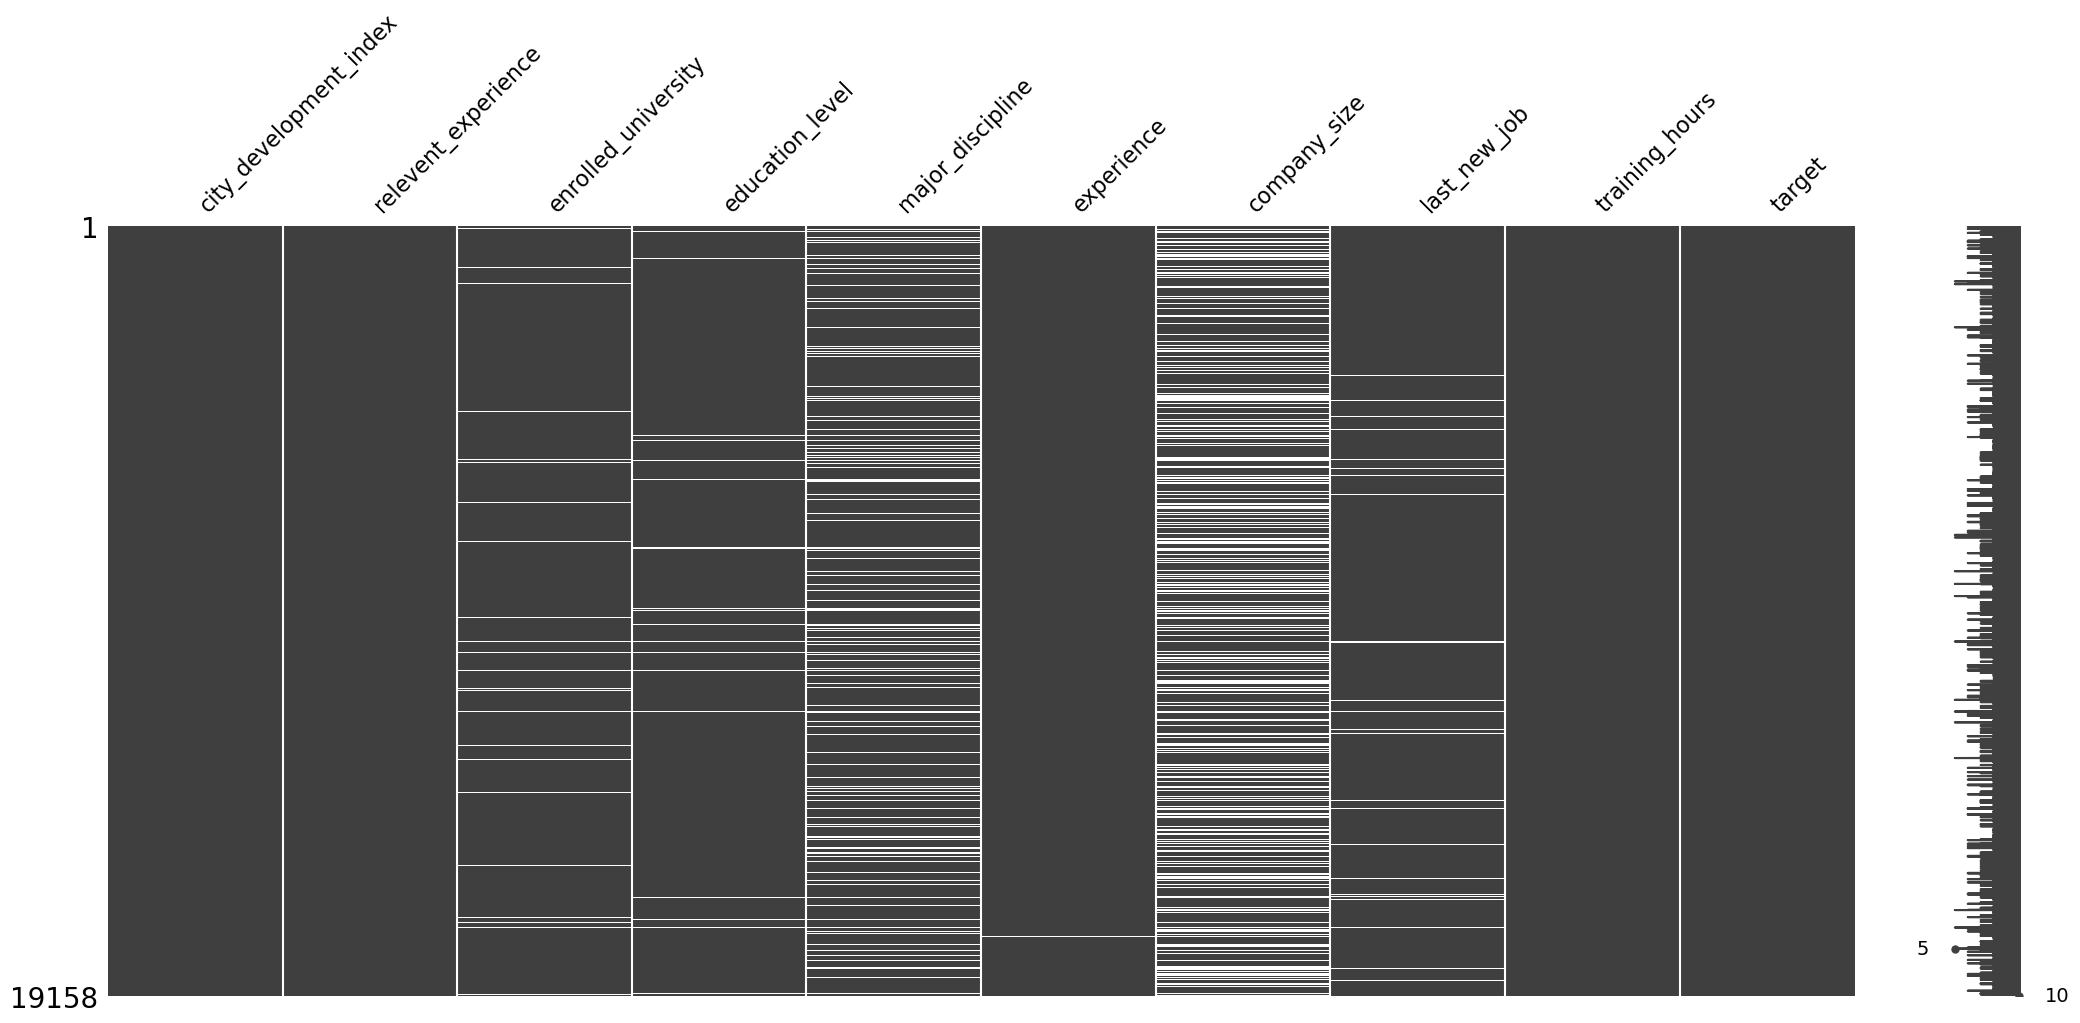

In [17]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [22]:
from reparo import MICE
imputer = MICE()

y = df['target']
X = df.drop('target', axis=1)

imputed_X = X.copy()
imputer.apply(imputed_X, imputed_X.columns)

df = pd.concat([imputed_X, y], axis=1)
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,0.920,0.214690,0.211406,0.27979,0.261593,21.0,3.458010,1.0,36,1.0
1,0.776,0.338427,0.211406,0.27979,0.261593,15.0,2.000000,5.0,47,0.0
2,0.624,0.338427,0.380889,0.27979,0.261593,5.0,2.936335,0.0,83,0.0
3,0.789,0.338427,0.309583,0.27979,0.262997,0.5,3.074413,0.0,52,1.0
4,0.767,0.214690,0.211406,0.21440,0.261593,21.0,2.000000,4.0,8,0.0


<Axes: >

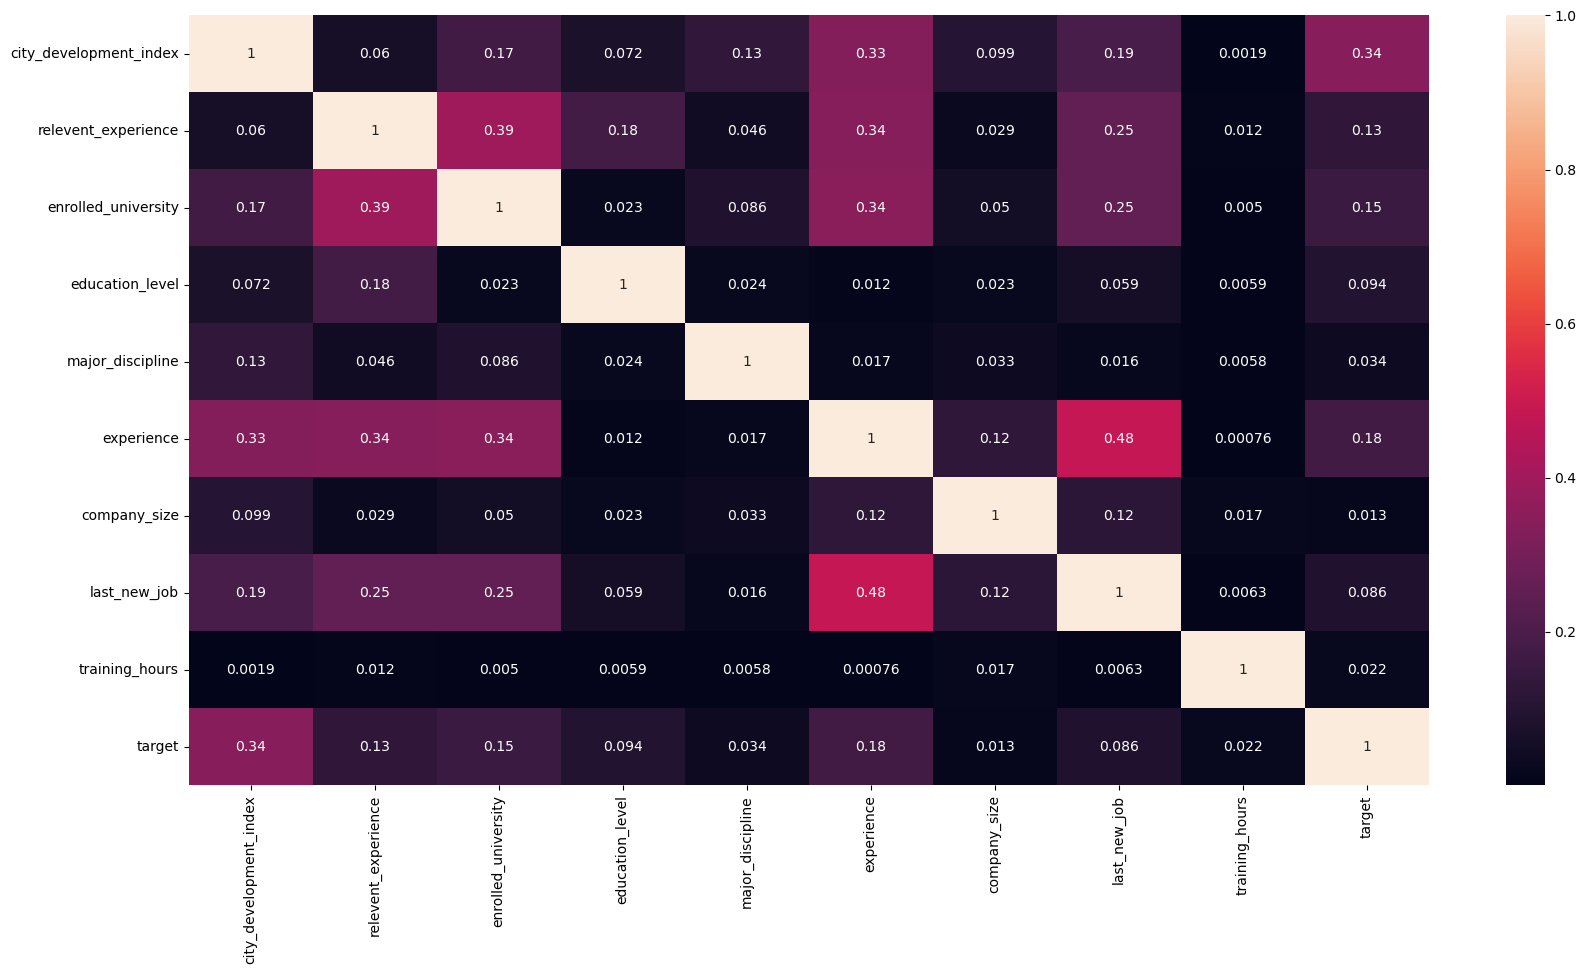

In [27]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

In [28]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                    1.000000
city_development_index    0.341665
experience                0.176215
enrolled_university       0.154762
relevent_experience       0.128430
education_level           0.094225
last_new_job              0.085526
major_discipline          0.034342
training_hours            0.021577
company_size              0.013439
Name: target, dtype: float64

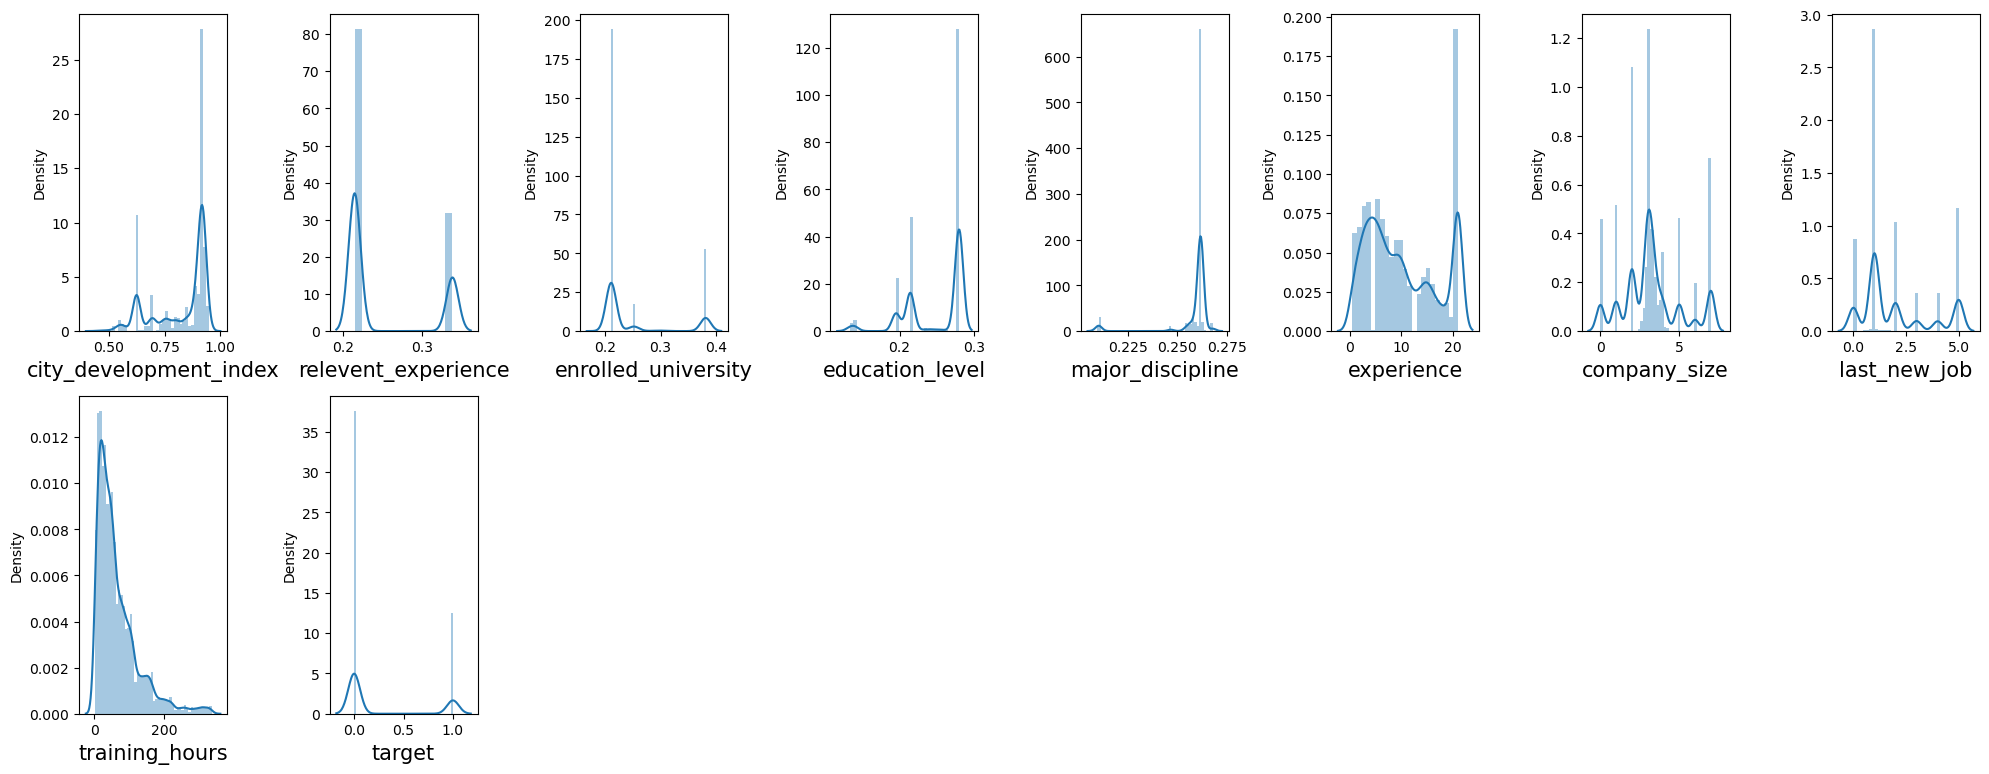

In [43]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(4, 8, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2880
         1.0       0.58      0.46      0.51       952

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.77      0.78      0.77      3832

